# Pruebas

+ En las definiciones de las funciones en LennardGas ya no se suponen valores predeterminados para los parámetros, siempre hay que darlos explicitamente para realizar pruebas.

In [19]:
push!(LOAD_PATH, pwd())
using LennardGas: flotante_a_entero, entero_a_flotante, 
                    fluctuacion_gaussiana, vector_fuerzas, 
                    paso_verlet, evolucion
using PyPlot, Colors

In [2]:
#Parámetros
r_c = 2.5
L   = r_c * 10
cajitas = 2^60
h = 0.005

particulas = 10

10

In [3]:
#Condición inicial (en Float64)
inicial = randn(3*particulas) .+ 10.0
segundo = fluctuacion_gaussiana(inicial, 0.1);

In [4]:
#Condición inicial (en Int64)
X0 = flotante_a_entero(inicial, L, cajitas)
X1 = flotante_a_entero(segundo, L, cajitas);

In [8]:
@time vector_fuerzas(X0 , L, cajitas, r_c, h);

  0.000573 seconds (2.04 k allocations: 135.234 KB)


In [9]:
@time X2 = paso_verlet(X0, X1, L, cajitas, r_c, h);

  0.000783 seconds (2.04 k allocations: 135.563 KB)


In [10]:
X_0 = paso_verlet(X2, X1, L, cajitas, r_c, h);
X0 == X_0

false

#### MUY poco reversible por ahora...

In [11]:
pasos = 10
@time registro = evolucion(X0, X1, pasos, L, cajitas, r_c, h)

12x30 Array{Int64,2}:
  485501705132252672   466014066392234176  …   525141947009945920
  492881010929807168   476133989756698880      527133419930088576
  318419360651878681   265412312225280130      457160406597081671
 1129719695386646590  1006958594511226512      288532775696165896
  272015742211477909  1126407996640886178     1034225957989413463
  520829675202755432   953931578579304916  …    51141682461298870
  160753588010141797   728428144585802058     1136509364667692545
  842336851223039026   104944858537215080       18317402582990008
  692505785849372873   938317861660232218       20222665226825585
 1074426918314937796   828659077250832540       58762733036641178
  535516620422682039   289792951401807840  …   137748131300107941
  992538654553454898   255323475447601244      334258995636857060

0.129291 seconds (105.22 k allocations: 5.586 MB, 3.34% gc time)


In [12]:
function prueba_reversible(X0, X1, pasos, L, cajitas, r_c, h) 
    #Se puede hacer sin guardar todos los intermediarios...
    
    registro_ida = evolucion(X0, X1, pasos, L, cajitas, r_c, h)
    X_ultima = collect(registro_ida[end,:])
    X_penultima = collect(registro_ida[end-1,:])

    registro_vuelta = evolucion(X_ultima, X_penultima, pasos, L, cajitas, r_c, h)
    X_original = collect(registro_vuelta[end,:])

    X0 == X_original , registro_ida, registro_vuelta
end

prueba_reversible (generic function with 1 method)

In [13]:
pasos = 1

prueba1 = prueba_reversible(X0, X1, pasos, L, cajitas, r_c, h)
prueba1[1]

false

In [14]:
prueba1[2]

3x30 Array{Int64,2}:
 485501705132252672  466014066392234176  …  525141947009945920
 492881010929807168  476133989756698880     527133419930088576
 318419360651878681  265412312225280130     457160406597081671

In [15]:
prueba1[3]

3x30 Array{Int64,2}:
 318419360651878681  265412312225280130  …  457160406597081671
 492881010929807168  476133989756698880     527133419930088576
 151337016171504690   64810558058326084     389178866184217422

**Algo anda muy mal**

In [16]:
pasos = 2

prueba2 = prueba_reversible(X0, X1, pasos, L, cajitas, r_c, h)
prueba2[1]

false

### Graficando

In [20]:
function dibujante(registro::Matrix{Int64}, tiempo::Int64)
    
    if 0 > tiempo > size(registro, 2)
        return println("El tiempo solicitado no se encuentra disponible en el registro dado.")
    end
    
    N = size(registro, 1)÷3 #Funciona si el número de entradas es múltiplo de 3
    x = zeros(N)
    y = zeros(N)
    z = zeros(N)
    
    coord = registro[tiempo, :]
    paleta = distinguishable_colors(N)
    for i in 1:N
        tinta = paleta[i]
        x = collect(coord[3i-2])
        y = collect(coord[3i-1])
        z = collect(coord[3i])
        plot3D(x, y, z, marker = "o", color = (tinta.r, tinta.g, tinta.b))
    end
end

dibujante (generic function with 1 method)

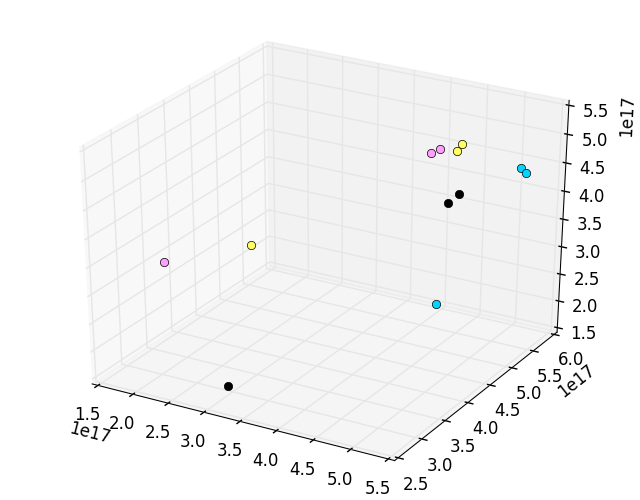

In [21]:
paso_temp = 3
for t in 1:paso_temp
    dibujante(registro, t)
end
#axis("off")

**Parece como si el error estuviera en la forma como se calculan las fuerzas**